## Monte Carlo Simulation

In [16]:
import datetime
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


In [17]:
# sets the sample period as 5 years back from 09/12/2019
end = datetime.datetime(2019, 9, 12)
start = end - datetime.timedelta(days = 7*365)


# gets the closing price fo Netflix for the past 5 years
my_stock = yf.Ticker('NFLX')
my_stock = pd.DataFrame(my_stock.history(start = start, end = end)['Close'])
my_stock = my_stock.rename(str.lower, axis = 'columns')


my_stock

,close
Date,
2012-09-13 00:00:00-04:00,8.285714
2012-09-14 00:00:00-04:00,8.645714
2012-09-17 00:00:00-04:00,8.145714
2012-09-18 00:00:00-04:00,8.008571
2012-09-19 00:00:00-04:00,8.148571
...,...
2019-09-05 00:00:00-04:00,293.250000
2019-09-06 00:00:00-04:00,290.170013
2019-09-09 00:00:00-04:00,294.339996


In [4]:
my_stock

,close
Date,
2012-09-13 00:00:00-04:00,8.285714
2012-09-14 00:00:00-04:00,8.645714
2012-09-17 00:00:00-04:00,8.145714
2012-09-18 00:00:00-04:00,8.008571
2012-09-19 00:00:00-04:00,8.148571
...,...
2019-09-05 00:00:00-04:00,293.250000
2019-09-06 00:00:00-04:00,290.170013
2019-09-09 00:00:00-04:00,294.339996


Tebemos un dataset, que tiene los horarios y el valor de el precio de la acción. Queremos hacer una simulación de monte carlo

In [6]:
my_stock_resid_distr_fitting = my_stock[-500:]
my_stock_resid_distr_fitting 

,close
Date,
2017-09-15 00:00:00-04:00,182.350006
2017-09-18 00:00:00-04:00,184.619995
2017-09-19 00:00:00-04:00,185.679993
2017-09-20 00:00:00-04:00,185.509995
2017-09-21 00:00:00-04:00,188.779999
...,...
2019-09-05 00:00:00-04:00,293.250000
2019-09-06 00:00:00-04:00,290.170013
2019-09-09 00:00:00-04:00,294.339996


In [8]:
my_stock_train = my_stock[~my_stock.isin(my_stock_resid_distr_fitting).all(1)]
my_stock_train

,close
Date,
2012-09-13 00:00:00-04:00,8.285714
2012-09-14 00:00:00-04:00,8.645714
2012-09-17 00:00:00-04:00,8.145714
2012-09-18 00:00:00-04:00,8.008571
2012-09-19 00:00:00-04:00,8.148571
...,...
2017-09-08 00:00:00-04:00,176.419998
2017-09-11 00:00:00-04:00,181.740005
2017-09-12 00:00:00-04:00,185.149994


In [9]:
my_stock_test = my_stock_resid_distr_fitting[-250:]

(array([ 6., 13., 15., 26., 14.,  3.,  2.,  2.,  4.,  2.,  1.,  0.,  0.,
         0.,  1.,  3.,  2.,  1.,  5.,  2.,  4.,  4.,  4.,  6.,  3.,  4.,
         4.,  6.,  9.,  9.,  9.,  9.,  4.,  7.,  5.,  8.,  6.,  4., 11.,
         6.,  2.,  2.,  1.,  0.,  6.,  5.,  1.,  2.,  2.,  5.]),
 array([177.00999451, 181.84919464, 186.68839478, 191.52759491,
        196.36679504, 201.20599518, 206.04519531, 210.88439545,
        215.72359558, 220.56279572, 225.40199585, 230.24119598,
        235.08039612, 239.91959625, 244.75879639, 249.59799652,
        254.43719666, 259.27639679, 264.11559692, 268.95479706,
        273.79399719, 278.63319733, 283.47239746, 288.3115976 ,
        293.15079773, 297.98999786, 302.829198  , 307.66839813,
        312.50759827, 317.3467984 , 322.18599854, 327.02519867,
        331.8643988 , 336.70359894, 341.54279907, 346.38199921,
        351.22119934, 356.06039948, 360.89959961, 365.73879974,
        370.57799988, 375.41720001, 380.25640015, 385.09560028,
        389.

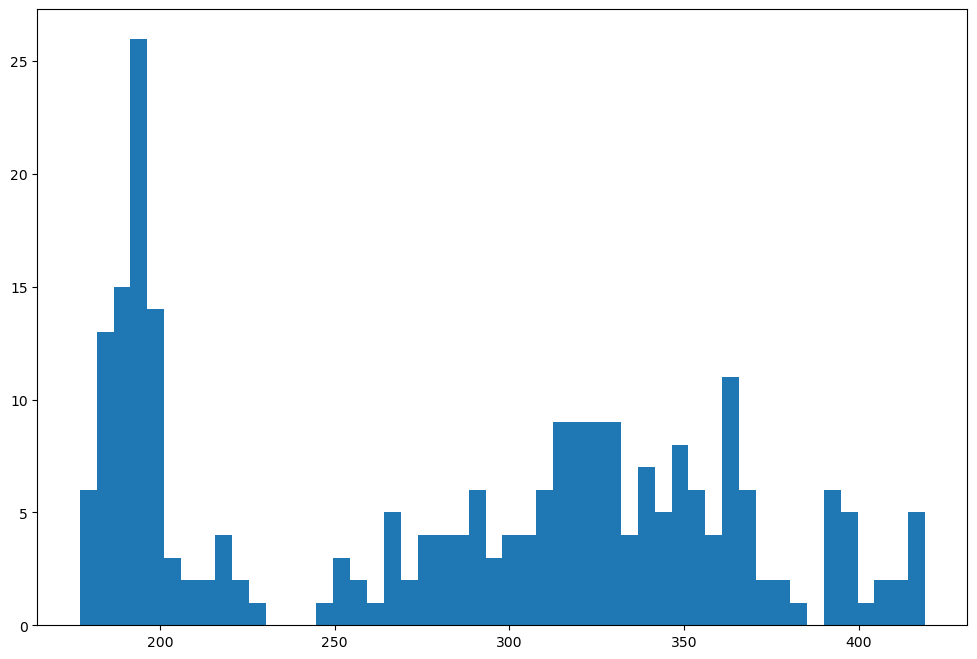

In [46]:
my_stock_resid_distr_fitting = my_stock_resid_distr_fitting[~my_stock_resid_distr_fitting.isin(my_stock_test).all(1)]
plt.hist(my_stock_resid_distr_fitting, bins = 50)

<function matplotlib.pyplot.show(close=None, block=None)>

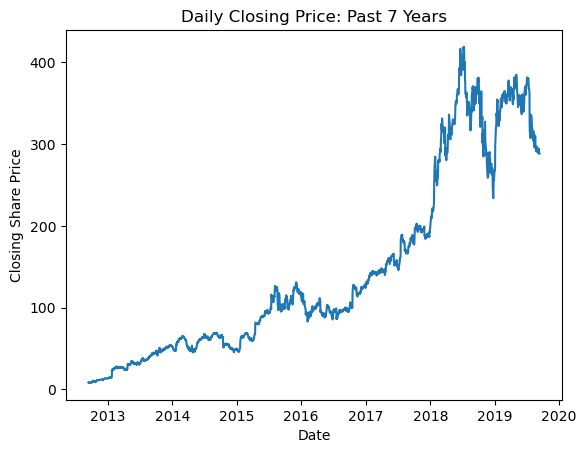

In [11]:
plt.plot(my_stock.index, my_stock.close)
plt.title('Daily Closing Price: Past 7 Years')
plt.xlabel('Date')
plt.ylabel('Closing Share Price')
plt.show

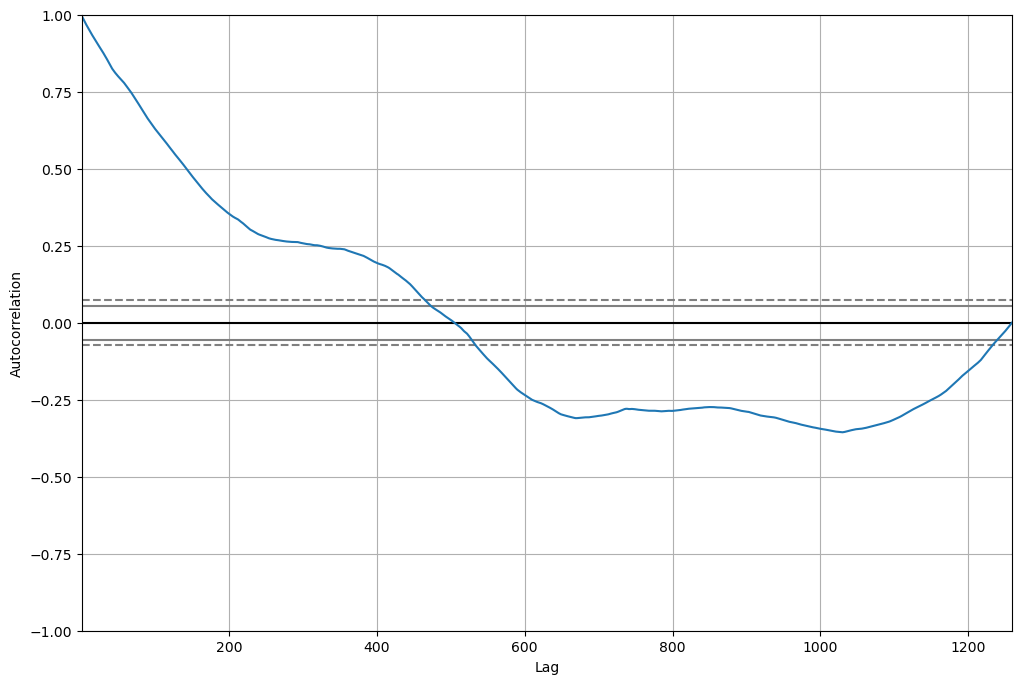

In [14]:



# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# plots the ACF for the entire train period
pd.plotting.autocorrelation_plot(my_stock_train.close)
plt.show()



c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2602.370
Date:                Sat, 04 Nov 2023   AIC                          -5198.740
Time:                        13:44:22   BIC                          -5183.328
Sample:                             0   HQIC                         -5192.948
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0433      0.360     -0.120      0.904      -0.749       0.663
ma.L1          0.1123      0.363      0.309      0.757      -0.599       0.824
sigma2         0.0009   1.19e-05     78.623      0.0

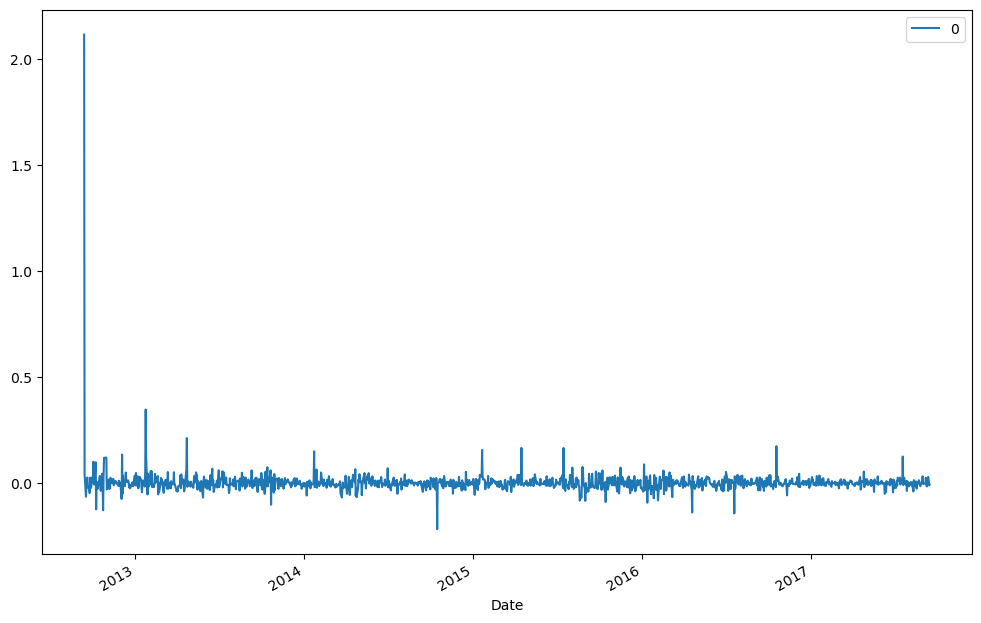

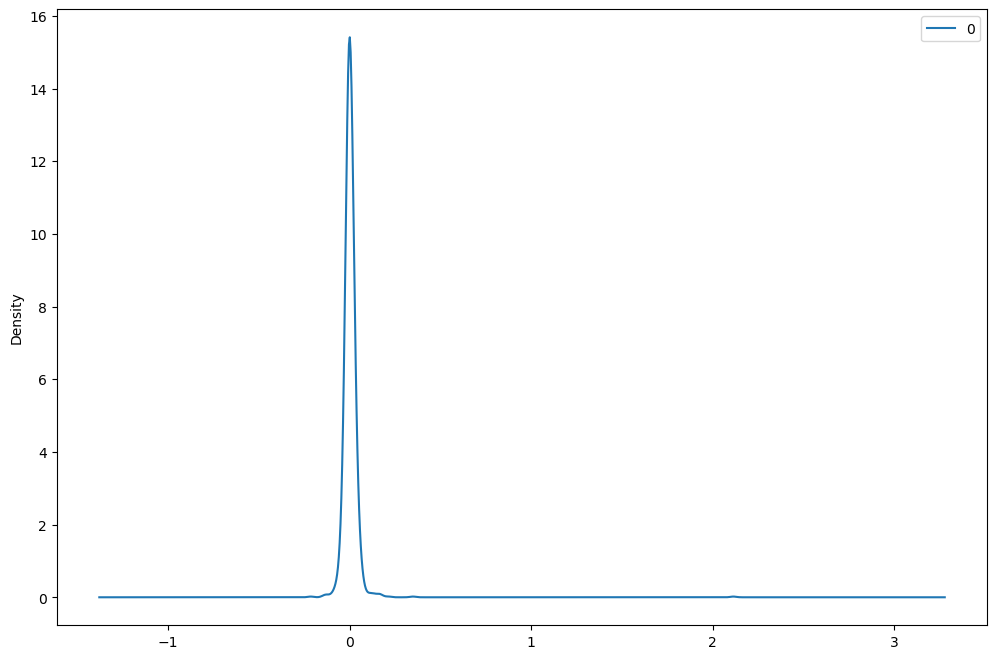

                 0
count  1259.000000
mean      0.003983
std       0.066882
min      -0.215004
25%      -0.011351
50%       0.000421
75%       0.014499
max       2.114533


In [53]:
from statsmodels.tsa.arima.model import ARIMA

my_stock_arima = ARIMA(np.log(my_stock_train), order=(1, 1, 1))
my_stock_arima_fit = my_stock_arima.fit()
print(my_stock_arima_fit.summary())

# sets the plot size to 12x8

# plot residual errors of the training data
residuals = pd.DataFrame(my_stock_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
